<a href="https://colab.research.google.com/github/AliciaFalconCaro/LLM_Chatbot_Movies/blob/main/DataAnalysisForMoviesDescription_Using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data downloaded from:
https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows/data?select=imdb_top_1000.csv


In [1]:
import pandas as pd
df = pd.read_csv("imdb_top_1000.csv")
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [2]:
# Let's first explore the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


The majority of the data information is non-numeric/text (categorical)
There is a total of 1000 entries.

In [3]:
#Let's check null values:
print("Missing values:", df.isnull().sum())

Missing values: Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


There are no missing values in the description.
We generate a word cloud with the most common words used in movies overviews

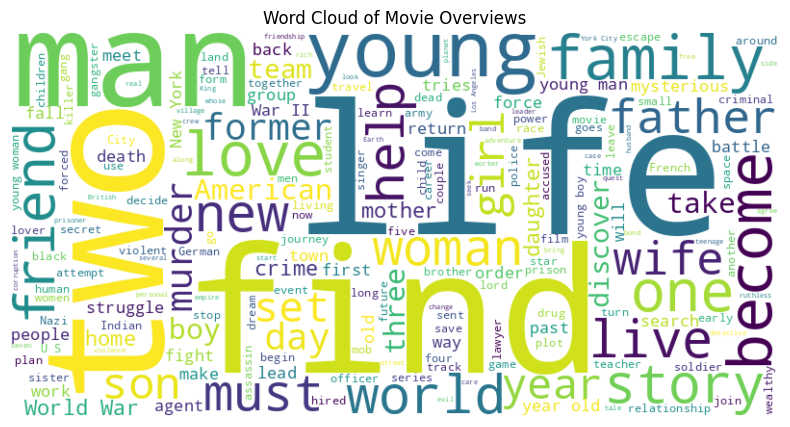

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all overviews into a single string
all_overviews = " ".join(df['Overview'].tolist())
#tolist():Converts the "Overview" column into a list of strings (each string is an overview for a movie).
#" ".join(...): Joins all the individual overviews into a single string, where each overview is separated by a space. This forms one long string containing all the movie descriptions

# Generate and plot the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_overviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Movie Overviews")
plt.show()


We implement some basic NLP analysis on these data.

In [7]:
#!pip install nltk scikit-learn (already installed in Colab)
#most common libraries used for NLP
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
import re



We start with text cleaning: removing punctuation, numbers, and converting text to lowercase.

In [10]:
# Text cleaning function
def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove numbers and punctuation
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove numbers

    return text

#apply function to all text
df['cleaned_overview'] = df['Overview'].apply(clean_text)
df[['cleaned_overview','Overview']].head()

,cleaned_overview,Overview
0,two imprisoned men bond over a number of years...,Two imprisoned men bond over a number of years...
1,an organized crime dynastys aging patriarch tr...,An organized crime dynasty's aging patriarch t...
2,when the menace known as the joker wreaks havo...,When the menace known as the Joker wreaks havo...
3,the early life and career of vito corleone in ...,The early life and career of Vito Corleone in ...
4,a jury holdout attempts to prevent a miscarria...,A jury holdout attempts to prevent a miscarria...


Now we preprocess the data. We perform:
  
  Tokenization: Split text into words (tokens).

  Stop Word Removal: Filtered out common, non-informative words.

  Lemmatization: Reduced words to their base forms.

First we donwload necessary NLP datasets/models

In [13]:
#For Tokenization:
#word_tokenize: This function splits text into individual words or tokens. To do so, it requires a tokenizer model that knows how to handle different punctuation marks and word boundaries. The punkt package provides this model.
nltk.download('punkt')
nltk.download('punkt_tab') #Download data required for tokenization

#Stopwords: These are common words like "the", "is", and "in", which don't carry much meaning in the context of text analysis and are often removed. NLTK provides a list of stopwords for various languages.
nltk.download('stopwords')

#Lemmatization: It reduces words to their base form (e.g., "running" → "run"). NLTK's WordNetLemmatizer relies on the WordNet lexical database, which provides information about words, their meanings, and how they are related.
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
# Initialize the stopwords and lemmatizer
stop_words = set(stopwords.words('english')) #we set the desired language for our stopwords list
lemmatizer = WordNetLemmatizer()

# Tokenization, stopword removal, and lemmatization function
def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text) #by default english

    # Remove stopwords and perform lemmatization
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word.isalpha()] #.isalpha checks if all letters in the word are alphabetic letters (no numeric)

    return " ".join(processed_tokens)

# Apply preprocessing
df['processed_overview'] = df['cleaned_overview'].apply(preprocess_text)
df[['processed_overview','cleaned_overview']].head()


,processed_overview,cleaned_overview
0,two imprisoned men bond number year finding so...,two imprisoned men bond over a number of years...
1,organized crime dynasty aging patriarch transf...,an organized crime dynastys aging patriarch tr...
2,menace known joker wreaks havoc chaos people g...,when the menace known as the joker wreaks havo...
3,early life career vito corleone new york city ...,the early life and career of vito corleone in ...
4,jury holdout attempt prevent miscarriage justi...,a jury holdout attempts to prevent a miscarria...


Now we perform Vectorization: convert the text data into a numerical representation using TF-IDF (Term Frequency-Inverse Document Frequency), which is commonly used for text feature extraction.

TF-IDF is a statistical measure used to evaluate the importance of a word within a document relative to a corpus of documents (i.e., a collection of texts). The idea is that a word that appears frequently in a document but rarely across other documents is likely to be more important and should have a higher score.

It creates a weighted representation of words, which is helpful for machine learning models to understand the relative importance of words.

In [21]:
# Initialize the TfidfVectorizer
#the max_features parameter is used to limit the number of features (terms/words) that are included in the resulting matrix.
tfidf_vectorizer = TfidfVectorizer(max_features=100)

# Fit and transform the processed overview text
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_overview'])

# Convert the result into a dense matrix
tfidf_Densematrix = tfidf_matrix.toarray()

# Display the TF-IDF scores for the top features
print(tfidf_Densematrix)
print("Features:", tfidf_vectorizer.get_feature_names_out())


# Show the TF-IDF scores (terms and their corresponding scores)
df_tfidf = pd.DataFrame(tfidf_Densematrix, columns=tfidf_vectorizer.get_feature_names_out())
print(df_tfidf)

# Convert the TF-IDF matrix into a DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print("DataFrame:",tfidf_df.head())


[[0.         0.         0.         ... 0.57096833 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.56951238 0.         0.         ... 0.         0.         0.        ]]
Features: ['agent' 'american' 'around' 'attempt' 'back' 'battle' 'become' 'becomes'
 'begin' 'boy' 'brother' 'child' 'city' 'come' 'crime' 'criminal'
 'daughter' 'day' 'death' 'detective' 'discovers' 'escape' 'fall' 'family'
 'father' 'fight' 'find' 'first' 'force' 'forced' 'former' 'friend'
 'future' 'german' 'get' 'girl' 'go' 'group' 'help' 'home' 'human' 'ii'
 'indian' 'journey' 'lead' 'life' 'live' 'love' 'make' 'man' 'meet' 'men'
 'mother' 'murder' 'must' 'mysterious' 'new' 'officer' 'old' 'one' 'order'
 'past' 'people' 'police' 'relationship' '

Analyze the most common terms in the movie overviews by checking the TF-IDF scores for each term

In [22]:
# Sum the TF-IDF scores for each term
sum_tfidf = tfidf_df.sum(axis=0)

# Create a DataFrame for better visualization
term_freq_df = pd.DataFrame(sum_tfidf, index=tfidf_df.columns, columns=['TF-IDF Score']).sort_values(by='TF-IDF Score', ascending=False)

# Display top 10 most frequent terms
print(term_freq_df.head(10))


        TF-IDF Score
life       58.745741
young      50.831193
man        47.578579
two        44.979995
find       43.689767
woman      35.210427
story      34.964140
family     33.792245
world      31.600119
love       30.027043


Now we apply K-means clustering to the vectorised tokens to cluster the descriptions/overviews of movies.

In [42]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(tfidf_matrix)

#Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_
df[['Cluster','Series_Title','Overview']].head(10)


,Cluster,Series_Title,Overview
0,1,The Shawshank Redemption,Two imprisoned men bond over a number of years...
1,1,The Godfather,An organized crime dynasty's aging patriarch t...
2,1,The Dark Knight,When the menace known as the Joker wreaks havo...
3,0,The Godfather: Part II,The early life and career of Vito Corleone in ...
4,1,12 Angry Men,A jury holdout attempts to prevent a miscarria...
5,1,The Lord of the Rings: The Return of the King,Gandalf and Aragorn lead the World of Men agai...
6,0,Pulp Fiction,"The lives of two mob hitmen, a boxer, a gangst..."
7,1,Schindler's List,"In German-occupied Poland during World War II,..."
8,1,Inception,A thief who steals corporate secrets through t...
9,1,Fight Club,An insomniac office worker and a devil-may-car...


In [43]:
print(df['Cluster'].value_counts())

Cluster
1    875
0    125
Name: count, dtype: int64


Since the number of clusters is an hyperparameter, we check the results using different number of clusters and decide the most optimum value. We implement the elbow method or the silhouette score.

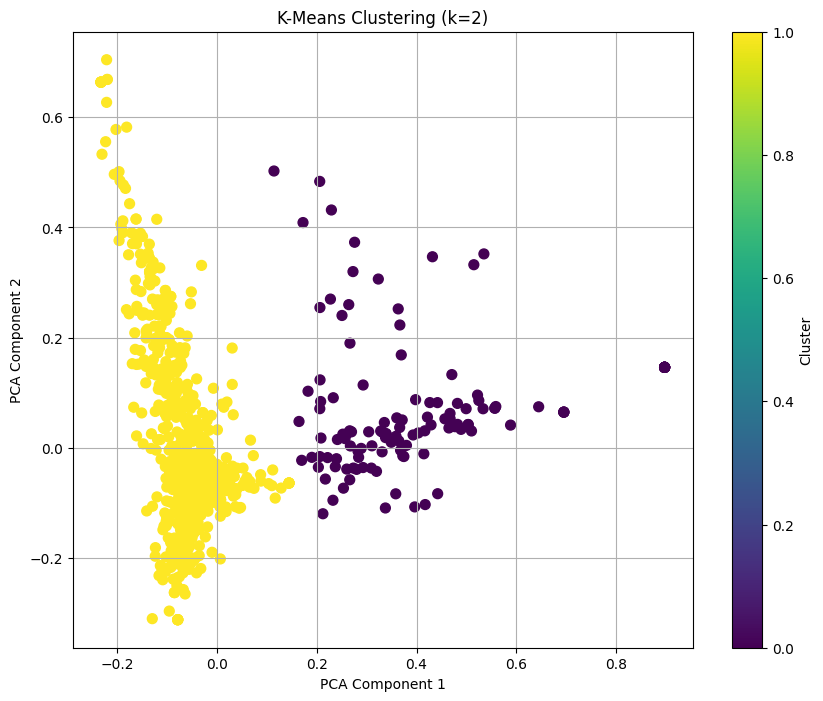

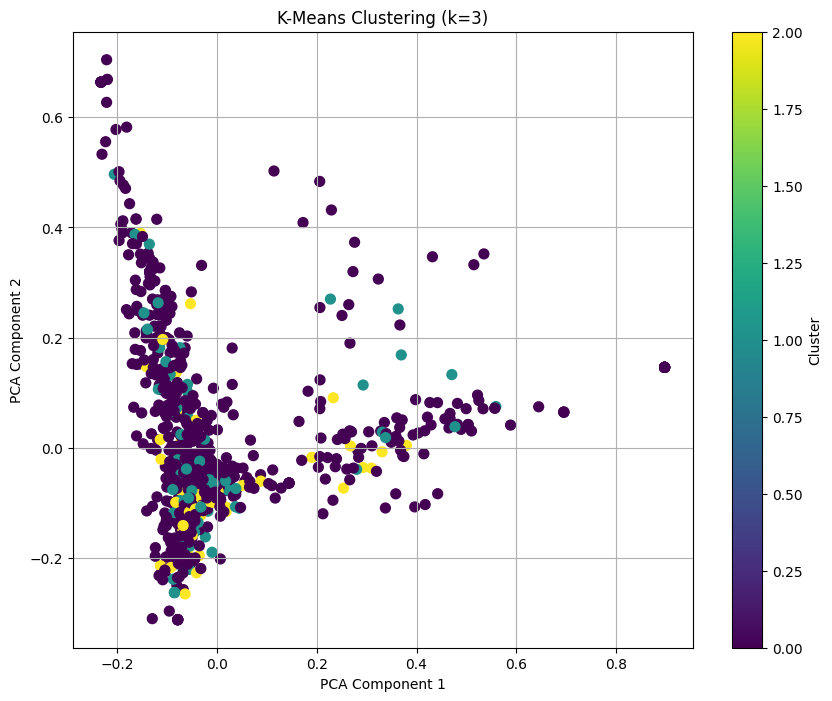

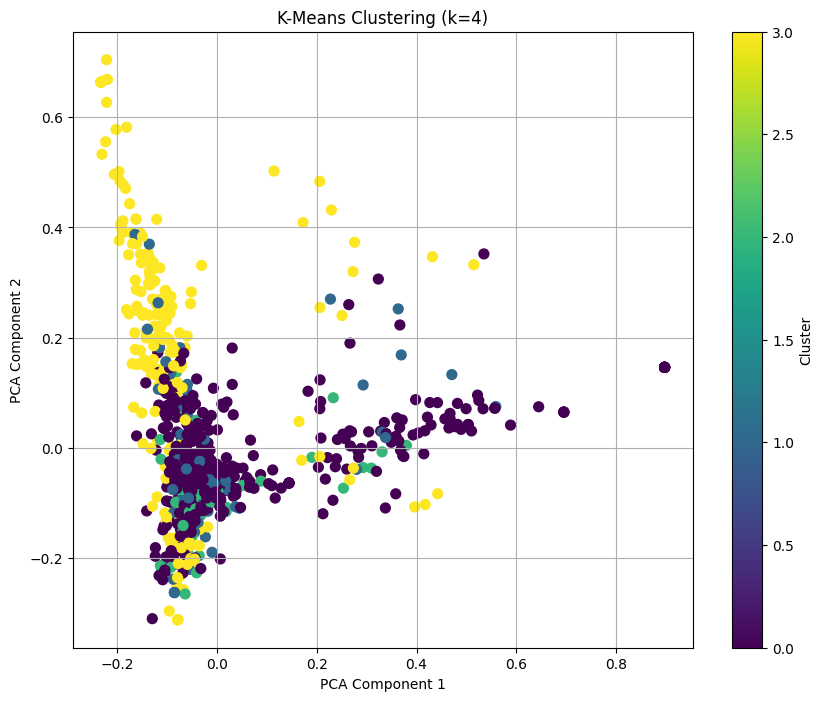

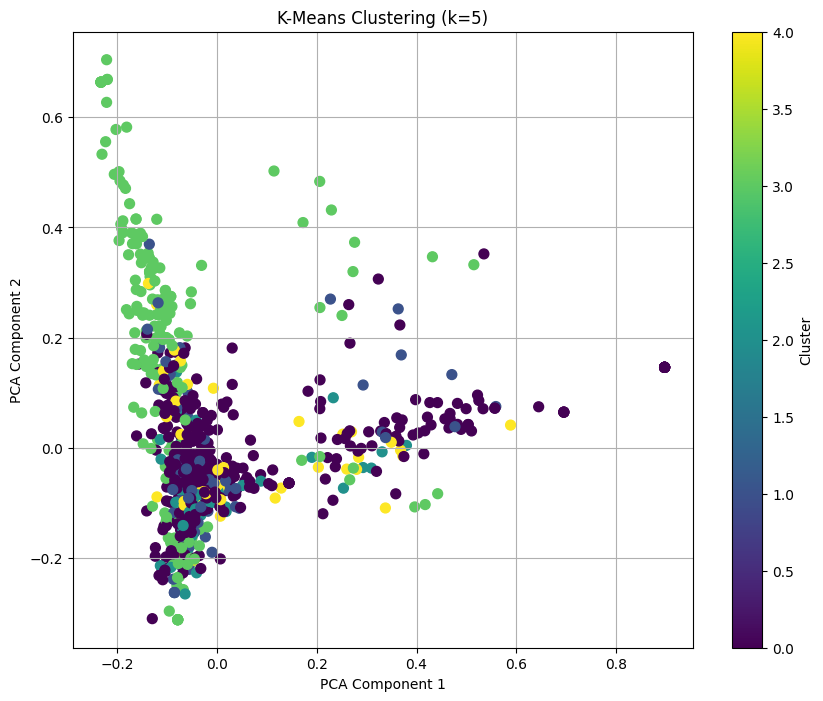

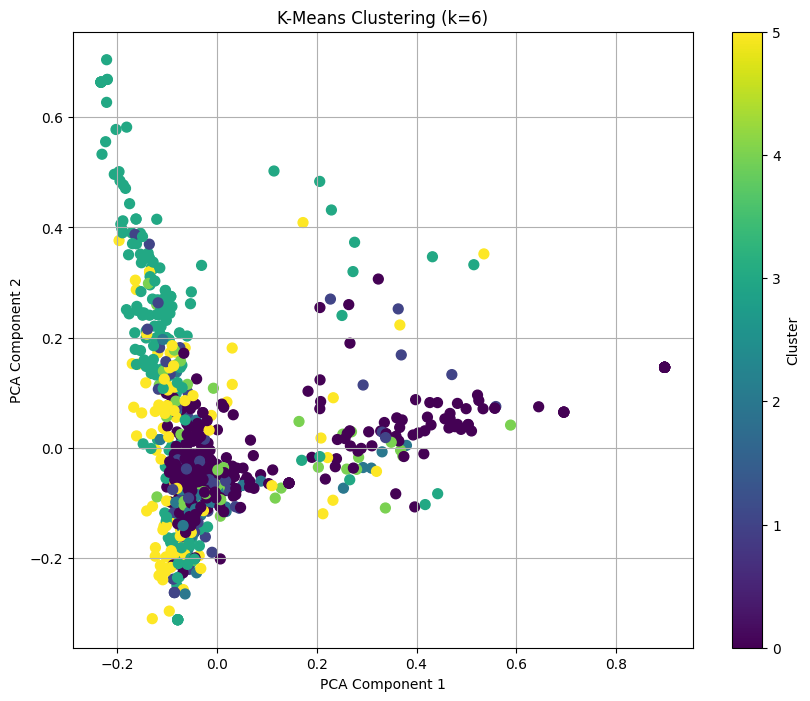

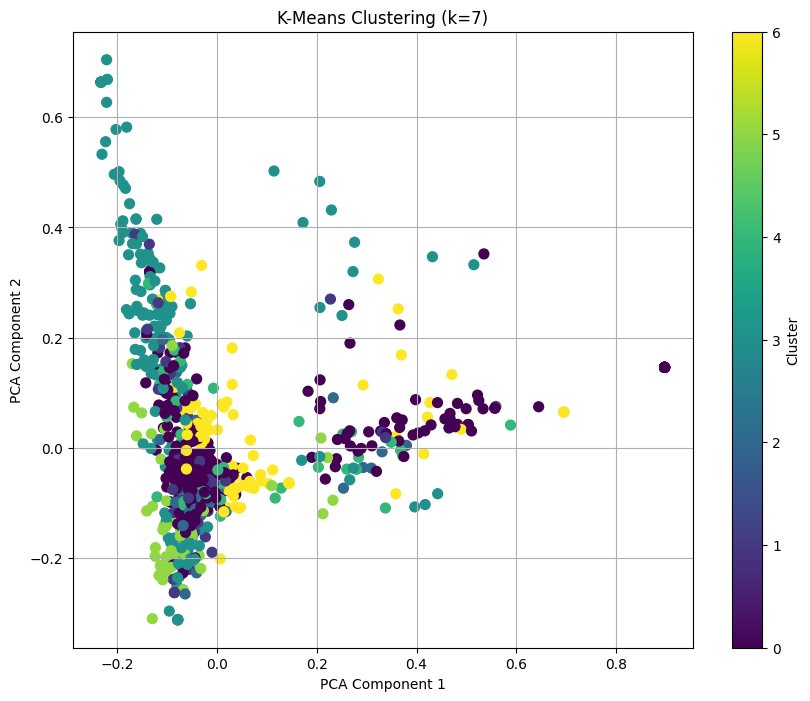

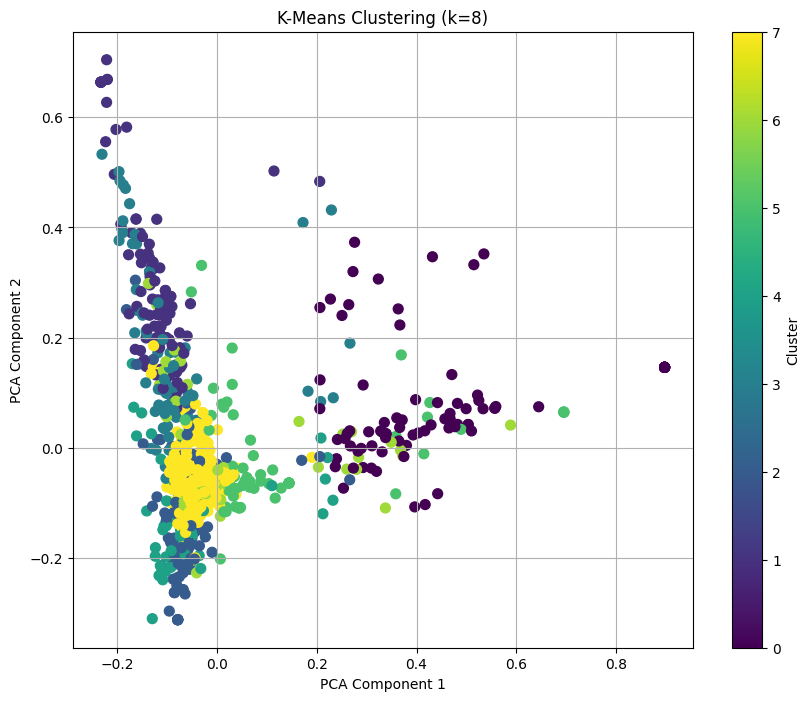

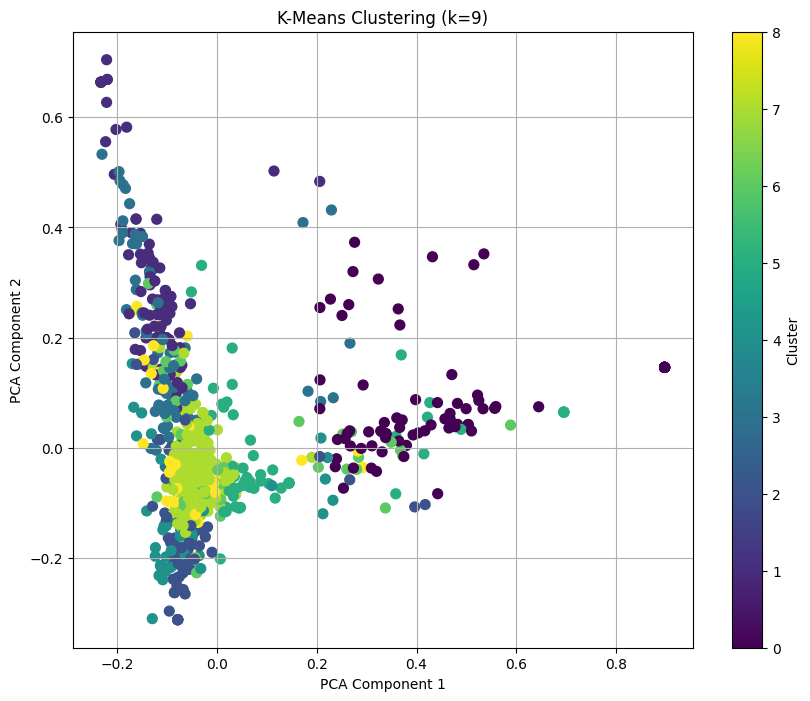

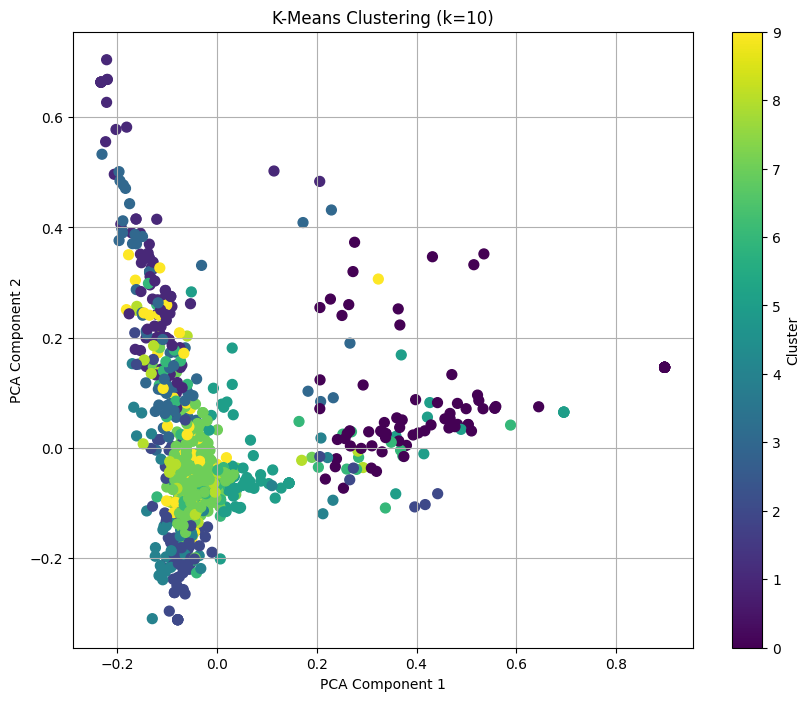

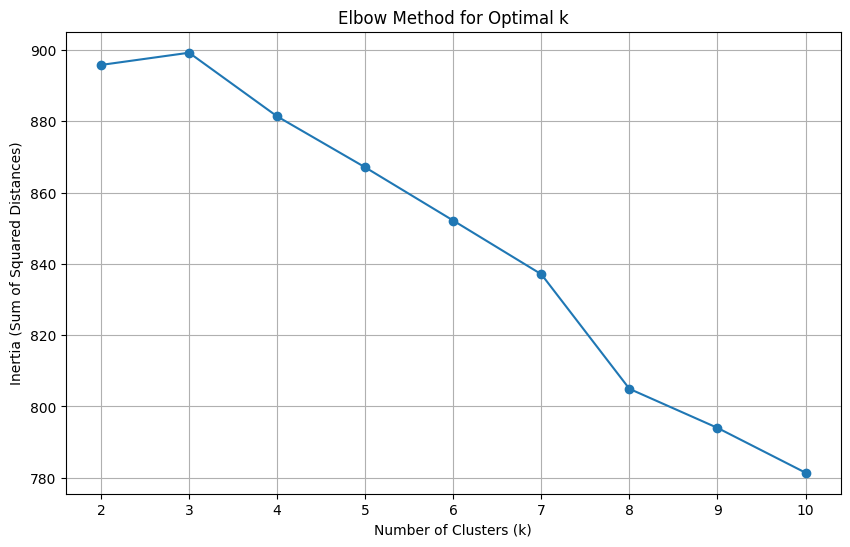

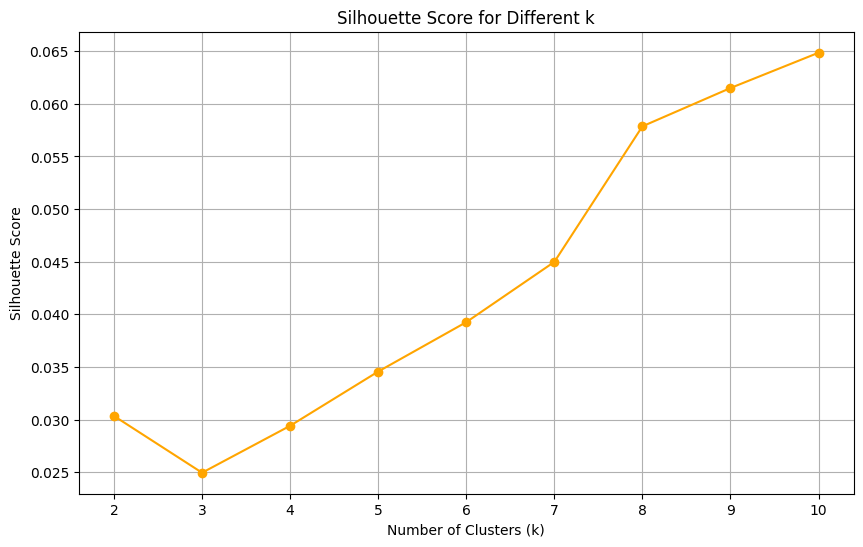

The best number of clusters based on the Silhouette Score is: 10


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

#Try different values of k (number of clusters) and evaluate clustering

# Function to plot K-Means results
def plot_kmeans_clusters(X, k_range):
    inertia = []
    silhouette_scores = []
    pca = PCA(n_components=2)  # Reduce to 2D for visualization

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)

        # Calculate inertia (sum of squared distances to centroids)
        inertia.append(kmeans.inertia_)

        # Calculate silhouette score
        score = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(score)

        # Reduce dimensions for plotting
        pca_components = pca.fit_transform(X.toarray())

        # Plot clusters
        plt.figure(figsize=(10, 8))
        plt.scatter(pca_components[:, 0], pca_components[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
        plt.title(f'K-Means Clustering (k={k})')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.colorbar(label='Cluster')
        plt.grid(True)
        plt.show()

    return inertia, silhouette_scores

# Range of k values to test
k_range = range(2, 11)  # Test between 2 and 10 clusters

# Plot clusters and calculate metrics for each k based on defined function
inertia, silhouette_scores = plot_kmeans_clusters(tfidf_matrix, k_range)

# Plot the Elbow Method (Inertia vs. k)
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

# Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Find the best k based on the highest silhouette score
best_k = k_range[np.argmax(silhouette_scores)]
print(f"The best number of clusters based on the Silhouette Score is: {best_k}")


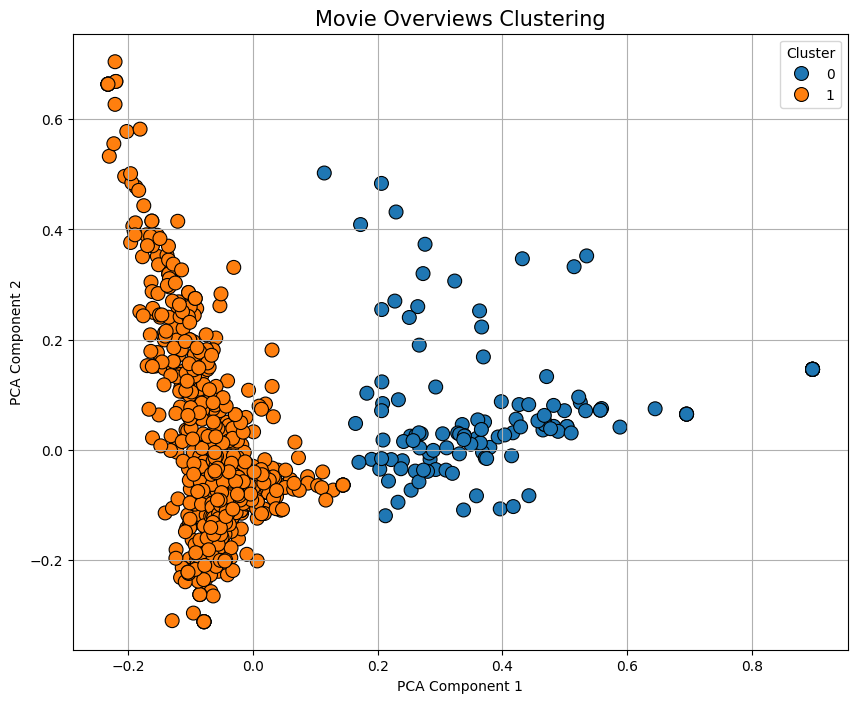

In [44]:
#Visualize the Clusters using PCA for dimensionality reduction
import seaborn as sns
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for easy visualization
pca_components = pca.fit_transform(tfidf_matrix.toarray())  # Convert sparse matrix to dense array

# Create a DataFrame for the PCA components and cluster labels
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = df['Cluster']

# Plot the Clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=100, marker='o', edgecolor='black')

plt.title("Movie Overviews Clustering", fontsize=15)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [45]:
# Print the Movies in each Cluster
for cluster in range(kmeans.n_clusters):
    print(f"\nCluster {cluster} Movies:")
    cluster_movies = df[df['Cluster'] == cluster].head(10)  # Show top 10 movies per cluster
    print(cluster_movies[['Series_Title','IMDB_Rating', 'Genre','Runtime']])


Cluster 0 Movies:
                   Series_Title  IMDB_Rating                      Genre  \
3        The Godfather: Part II          9.0               Crime, Drama   
6                  Pulp Fiction          8.9               Crime, Drama   
14                   The Matrix          8.7             Action, Sci-Fi   
15                   Goodfellas          8.7    Biography, Crime, Drama   
18                     Hamilton          8.6  Biography, Drama, History   
25               The Green Mile          8.6      Crime, Drama, Fantasy   
32        It's a Wonderful Life          8.6     Drama, Family, Fantasy   
55                 Vikram Vedha          8.4       Action, Crime, Drama   
67          The Lives of Others          8.4   Drama, Mystery, Thriller   
71  Once Upon a Time in America          8.4               Crime, Drama   

    Runtime  
3   202 min  
6   154 min  
14  136 min  
15  146 min  
18  160 min  
25  189 min  
32  130 min  
55  147 min  
67  137 min  
71  229 min  

